In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Matplotlib created a temporary cache directory at /tmp/matplotlib-47ujqa7u because the default path (/afs/glue.umd.edu/home/glue/m/k/mkrishn9/home/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
try:
    # Replace 'your_hutubs_data.csv' with the actual file name/path
    data = pd.read_csv('/export/mkrishn9/hrtf_field/hutubs/AntrhopometricMeasures.csv')
    print("Dataset loaded successfully.")
    print("Dataset Head:")
    print(data.head())
except FileNotFoundError:
    print("Error: 'your_hutubs_data.csv' not found. Please replace with your actual file path.")
    print("Using mock data for demonstration instead.")
    # Fallback to mock data if file not found, for demonstration
    num_subjects = 100
    np.random.seed(42)
    data = pd.DataFrame({
        'SubjectID': range(1, num_subjects + 1),
        'x1': np.random.rand(num_subjects) * 10,
        'L_d1': np.random.normal(loc=10, scale=1, size=num_subjects),
        'R_d1': np.random.normal(loc=10, scale=1, size=num_subjects),
        'L_d2': np.random.normal(loc=12, scale=1.2, size=num_subjects),
        'R_d2': np.random.normal(loc=12, scale=1.2, size=num_subjects),
        'L_d3': np.random.normal(loc=15, scale=1.5, size=num_subjects),
        'R_d3': np.random.normal(loc=15, scale=1.5, size=num_subjects),
        'L_d4': np.random.normal(loc=8, scale=0.8, size=num_subjects),
        'R_d4': np.random.normal(loc=8, scale=0.8, size=num_subjects),
        'L_theta1': np.random.normal(loc=30, scale=3, size=num_subjects),
        'R_theta1': np.random.normal(loc=30, scale=3, size=num_subjects),
    })
    print("Mock Dataset Head:")
    print(data.head())

# Identify L/R measurement columns (assuming they all start with L_ or R_)
l_columns = [col for col in data.columns if col.startswith('L_')]
r_columns = [col for col in data.columns if col.startswith('R_')]
x_columns = [col for col in data.columns if col.startswith('x')]
ear_measurement_columns = l_columns + r_columns + x_columns

# %% [markdown]
# ## 2. Descriptive Statistics
#
# Summary of basic statistics for the ear measurements.

# %%
if 'data' in locals() and ear_measurement_columns:
    print("\nDescriptive Statistics (Ear Measurements Only):")
    numeric_ear_data = data[ear_measurement_columns].apply(pd.to_numeric, errors='coerce')
    print(numeric_ear_data.describe())
else:
    print("Data or ear measurement columns not found. Skipping descriptive statistics.")

Dataset loaded successfully.
Dataset Head:
   SubjectID       x1       x2       x3      x4      x5       x6      x7  \
0          1  14.8100  21.5500  18.7300  0.0835  0.1185  11.8500  8.3700   
1          2  14.9630  20.8235  18.8594  0.1606  0.2723  11.2244  8.3058   
2          3  15.9721  21.3795  19.0451  0.8214  0.0508  13.3587  6.1397   
3          4  14.7190  20.1949  20.1943  0.0718  0.2082  11.3841  8.0550   
4          5  16.0487  23.2458  20.8623  0.4567  0.2331  12.9893  7.3182   

        x8    x9  ...    R_d3    R_d4    R_d5    R_d6  R_d7  R_d8  R_d9  \
0  11.8000  30.6  ...  1.7700  2.2700  6.0100  3.1800  0.72  1.10  1.10   
1  11.7271  45.1  ...  1.7066  2.1061  6.0800  2.8941  0.60  1.05  1.23   
2  12.0381  40.9  ...  1.7507  2.0938  6.0209  3.0028  0.70  1.09  1.16   
3  10.7329  31.7  ...  1.9799  2.3290  6.0968  2.5056  0.58  1.24  1.20   
4  12.7996  37.1  ...  2.0926  1.9847  6.2940  2.9923  0.45  1.14  1.20   

   R_d10  R_theta1  R_theta2  
0   0.23   12.2154

<ipython-input-3-647d310fef8d>:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(plot_data.values, labels=plot_data.columns, patch_artist=True)
<ipython-input-3-647d310fef8d>:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(plot_data.values, labels=plot_data.columns, patch_artist=True)
<ipython-input-3-647d310fef8d>:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(plot_data.values, labels=plot_data.columns, patch_artist=True)
<ipython-input-3-647d310fef8d>:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; suppor

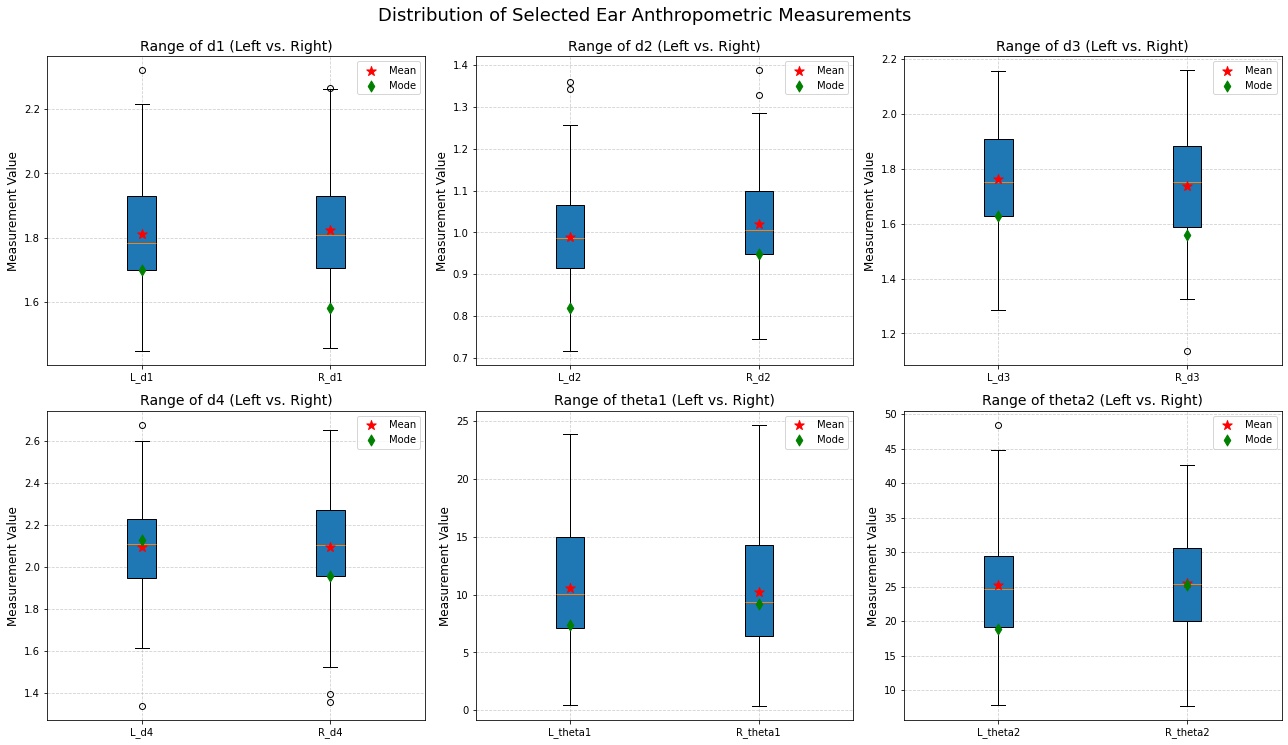

In [3]:
if 'data' in locals():
    features_to_plot_subset = {
        'd1': ('L_d1', 'R_d1'),
        'd2': ('L_d2', 'R_d2'),
        'd3': ('L_d3', 'R_d3'),
        'd4': ('L_d4', 'R_d4'),
        'theta1': ('L_theta1', 'R_theta1'),
        'theta2': ('L_theta2', 'R_theta2')
    }

    valid_features_to_plot = {}
    for name, (l_col, r_col) in features_to_plot_subset.items():
        if l_col in data.columns and r_col in data.columns:
            valid_features_to_plot[name] = (l_col, r_col)

    if valid_features_to_plot:
        num_plots = len(valid_features_to_plot)
        ncols = 3
        nrows = (num_plots + ncols - 1) // ncols

        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 5 * nrows), squeeze=False)
        axes = axes.flatten()

        for i, (feature_name, (left_col, right_col)) in enumerate(valid_features_to_plot.items()):
            ax = axes[i]
            plot_data = data[[left_col, right_col]].apply(pd.to_numeric, errors='coerce').dropna()

            # Matplotlib's boxplot takes a list of arrays/series
            ax.boxplot(plot_data.values, labels=plot_data.columns, patch_artist=True)

            # --- Add Mean and Mode Markers ---
            # Calculate means and modes
            means = plot_data.mean().values
            # The .mode() method returns a Series; we take the first value if it exists.
            modes = [s.mode().iloc[0] if not s.mode().empty else np.nan for _, s in plot_data.items()]

            # X-positions for the markers are 1, 2, 3...
            x_positions = np.arange(1, len(plot_data.columns) + 1)

            # Plot means
            ax.scatter(x_positions, means, marker='*', color='red', s=100, zorder=3, label='Mean')
            # Plot modes
            ax.scatter(x_positions, modes, marker='d', color='green', s=60, zorder=3, label='Mode')

            ax.set_title(f'Range of {feature_name} (Left vs. Right)', fontsize=14)
            ax.set_ylabel('Measurement Value', fontsize=12)
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.legend() # Add legend to each subplot

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.suptitle('Distribution of Selected Ear Anthropometric Measurements', fontsize=18, y=1.03 if nrows > 0 else 1.0)
        plt.show()
    else:
        print("No valid features found to plot. Check column names.")

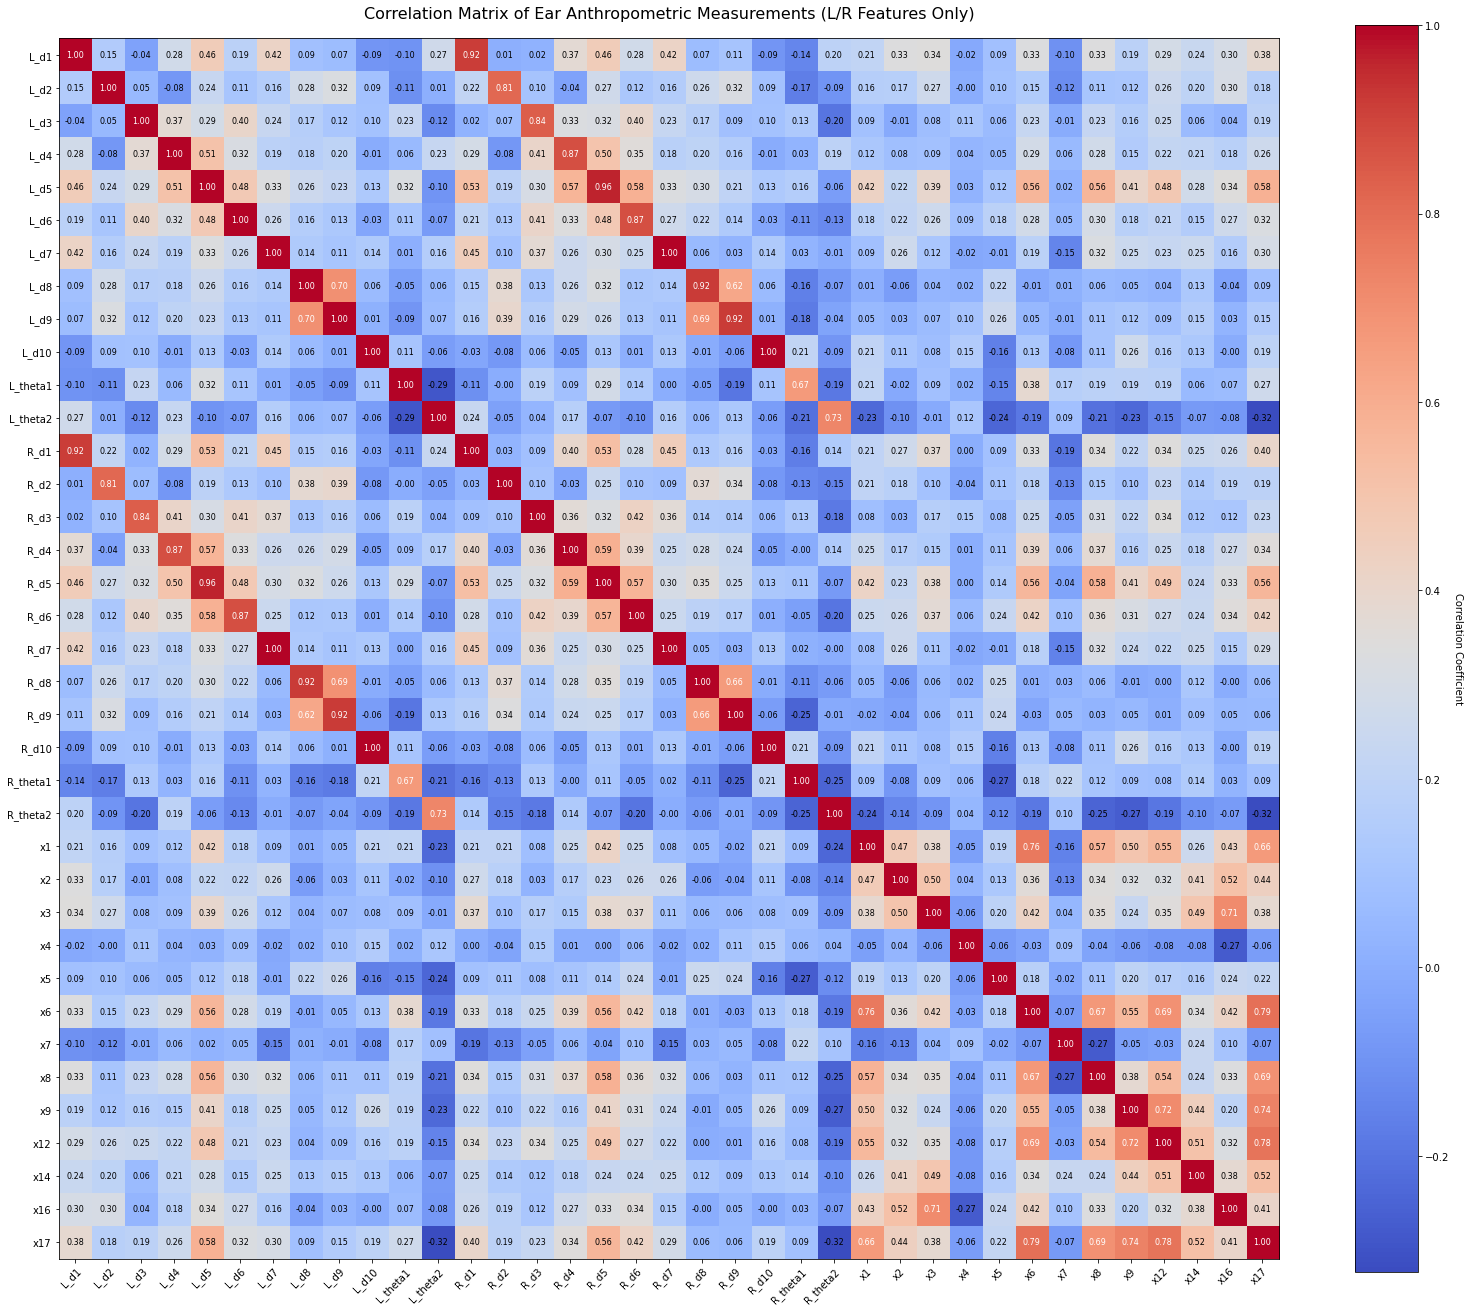

In [4]:
if 'data' in locals() and ear_measurement_columns:
    corr_data = data[ear_measurement_columns].apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')

    if not corr_data.empty:
        correlation_matrix = corr_data.corr()

        fig, ax = plt.subplots(figsize=(max(12, len(corr_data.columns)*0.6), max(10, len(corr_data.columns)*0.5)))
        im = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

        # Create colorbar
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel("Correlation Coefficient", rotation=-90, va="bottom")

        # Set ticks and labels
        ax.set_xticks(np.arange(len(correlation_matrix.columns)))
        ax.set_yticks(np.arange(len(correlation_matrix.index)))
        ax.set_xticklabels(correlation_matrix.columns)
        ax.set_yticklabels(correlation_matrix.index)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        for i in range(len(correlation_matrix.index)):
            for j in range(len(correlation_matrix.columns)):
                # Use a contrasting color for the text
                text_color = "w" if abs(correlation_matrix.iloc[i, j]) > 0.6 else "black"
                ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                               ha="center", va="center", color=text_color, size=8)

        ax.set_title('Correlation Matrix of Ear Anthropometric Measurements (L/R Features Only)', fontsize=16, pad=20)
        fig.tight_layout()
        plt.show()
    else:
        print("No numeric ear measurement data available for correlation matrix.")
else:
    print("Data or ear measurement columns not found. Skipping correlation analysis.")

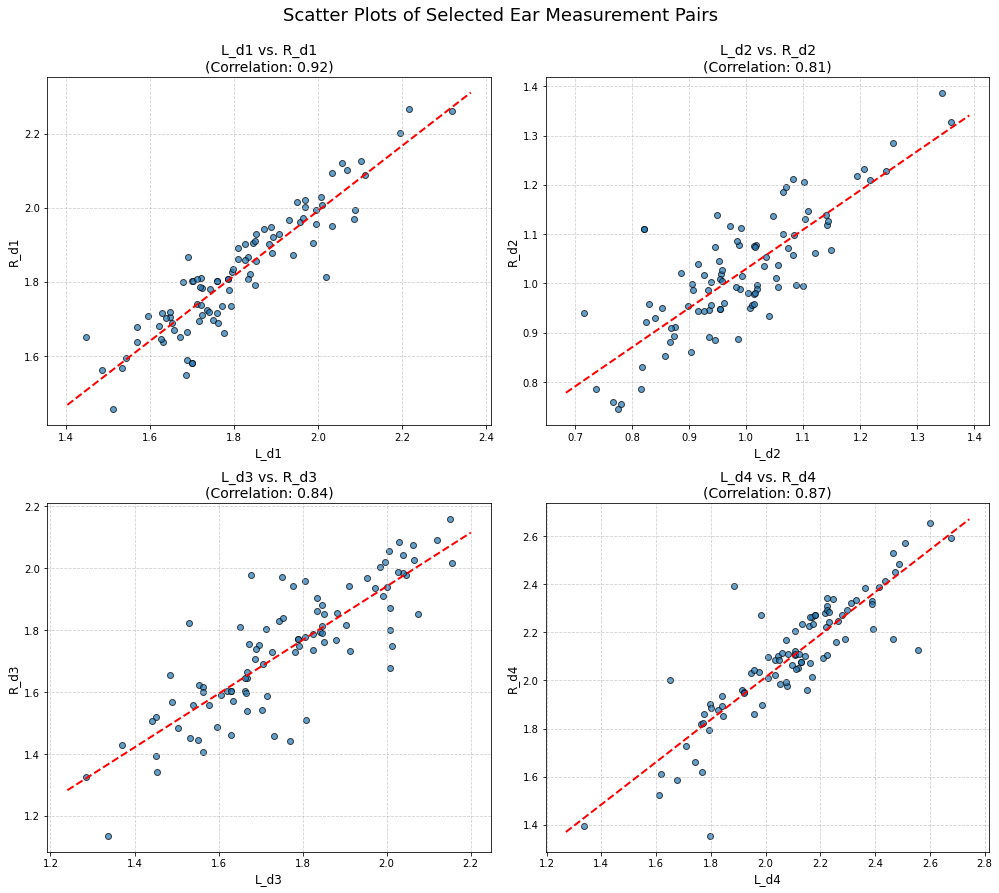

In [6]:
if 'data' in locals():
    scatter_pairs_subset = [
        ('L_d1', 'R_d1'),
        ('L_d2', 'R_d2'),
        ('L_d3', 'R_d3'),
        ('L_d4', 'R_d4'),
    ]

    valid_scatter_pairs = []
    for (l_col, r_col) in scatter_pairs_subset:
        if l_col in data.columns and r_col in data.columns:
            valid_scatter_pairs.append((l_col, r_col))

    if valid_scatter_pairs:
        num_scatter_plots = len(valid_scatter_pairs)
        ncols_scatter = 2
        nrows_scatter = (num_scatter_plots + ncols_scatter - 1) // ncols_scatter

        fig, axes = plt.subplots(nrows=nrows_scatter, ncols=ncols_scatter, figsize=(7 * ncols_scatter, 6 * nrows_scatter), squeeze=False)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(valid_scatter_pairs):
            ax = axes[i]
            plot_df = data[[x_col, y_col]].apply(pd.to_numeric, errors='coerce').dropna()

            if len(plot_df) > 1:
                # Create the scatter plot
                ax.scatter(plot_df[x_col], plot_df[y_col], alpha=0.7, edgecolor='k')

                # Calculate and plot regression line using numpy
                m, b = np.polyfit(plot_df[x_col], plot_df[y_col], 1)
                x_vals = np.array(ax.get_xlim())
                y_vals = b + m * x_vals
                ax.plot(x_vals, y_vals, '--', color='red', linewidth=2)

                correlation_val = plot_df[x_col].corr(plot_df[y_col])
                ax.set_title(f'{x_col} vs. {y_col}\n(Correlation: {correlation_val:.2f})', fontsize=14)
            else:
                ax.set_title(f'{x_col} vs. {y_col}\n(Not enough data for plot)', fontsize=14)

            ax.set_xlabel(x_col, fontsize=12)
            ax.set_ylabel(y_col, fontsize=12)
            ax.grid(True, linestyle='--', alpha=0.6)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.suptitle('Scatter Plots of Selected Ear Measurement Pairs', fontsize=18, y=1.03 if nrows_scatter > 0 else 1.0)
        plt.show()
    else:
        print("No valid pairs found for scatter plots. Check column names.")
else:
    print("Data not loaded. Skipping scatter plots.")

In [7]:
if 'data' in locals():
    print("\nPaired t-tests for Left vs. Right Ear Measurements:")
    all_l_cols = sorted([col for col in data.columns if col.startswith('L_')])

    for l_col_name in all_l_cols:
        r_col_name = 'R_' + l_col_name[2:]
        if r_col_name in data.columns:
            paired_data = data[[l_col_name, r_col_name]].copy()
            paired_data[l_col_name] = pd.to_numeric(paired_data[l_col_name], errors='coerce')
            paired_data[r_col_name] = pd.to_numeric(paired_data[r_col_name], errors='coerce')
            paired_data.dropna(inplace=True)

            if len(paired_data) > 1:
                t_statistic, p_value = stats.ttest_rel(paired_data[l_col_name], paired_data[r_col_name])
                print(f"\nTest for {l_col_name} vs. {r_col_name}:")
                print(f"  Number of pairs: {len(paired_data)}")
                print(f"  T-statistic: {t_statistic:.3f}")
                print(f"  P-value: {p_value:.3f}")
                if p_value < 0.05:
                    print(f"  The difference is statistically significant (p < 0.05).")
                else:
                    print(f"  No statistically significant difference (p >= 0.05).")
            else:
                print(f"\nTest for {l_col_name} vs. {r_col_name}: Not enough valid paired data points to perform t-test.")
        else:
            print(f"\nWarning: Corresponding right ear column '{r_col_name}' not found for '{l_col_name}'.")
else:
    print("Data not loaded. Skipping paired t-tests.")


Paired t-tests for Left vs. Right Ear Measurements:

Test for L_d1 vs. R_d1:
  Number of pairs: 93
  T-statistic: -2.127
  P-value: 0.036
  The difference is statistically significant (p < 0.05).

Test for L_d10 vs. R_d10:
  Number of pairs: 93
  T-statistic: nan
  P-value: nan
  No statistically significant difference (p >= 0.05).

Test for L_d2 vs. R_d2:
  Number of pairs: 93
  T-statistic: -4.066
  P-value: 0.000
  The difference is statistically significant (p < 0.05).

Test for L_d3 vs. R_d3:
  Number of pairs: 93
  T-statistic: 2.218
  P-value: 0.029
  The difference is statistically significant (p < 0.05).

Test for L_d4 vs. R_d4:
  Number of pairs: 93
  T-statistic: -0.187
  P-value: 0.852
  No statistically significant difference (p >= 0.05).

Test for L_d5 vs. R_d5:
  Number of pairs: 93
  T-statistic: -0.633
  P-value: 0.529
  No statistically significant difference (p >= 0.05).

Test for L_d6 vs. R_d6:
  Number of pairs: 93
  T-statistic: -1.750
  P-value: 0.083
  No stati